In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np
import warnings
path = 'C:/Users/Nienke Tempel/Documents/Thesis/11. Model/Model'
output = 'Output10'
colors = ['#0098FA', '#0167A9', '#002C48'] # blauw blauw blauw
TUblauw = "#0076C2"
import statistics
import seaborn as sns

## WFLOW ids

In [32]:
WFLOW = dict([
    ("La Meuse Goncourt", "1011"),
    ("Le Mouzon Circourt-sur-Mouzon [Villars]", "1013"),
    ("Le Vair Soulosse-sous-Saint-Élophe", "1016"),
    ("La Meuse Saint-Mihiel", "101"),
    ("La Meuse Stenay", "3"),
    ("La Bar Cheveuges", "41"),
    ("La Vence la Francheville", "42"),
    ("La Sormonne Belval", "43"),
    ("Membre Pont ", "5"),
    ("Sainte-Marie", "503"),
    ("Straimont ", "501"),
    ("La Chiers Carignan", "201"),
    ("La Chiers Longlaville", "203"),
    ("La Crusnes Pierrepont", "206"),
    ("Le Ton Écouviez", "207"),
    ("Le Loison Han-lés-Juvigny", "209"),
    ("Treignes ", "6"),
    ("Chooz ", "4"),
    ("Daverdisse ", "802"),
    ("Jemelle ", "803"),
    ("Gendron ", "801"),
    ("Hastiere", "701"),
    ("Yvoir ", "702"),
    ("Warnant ", "703"),
    ("Modave ", "704"),
    ("Ortho ", "1002"),
    ("Mabompre ", "1003"),
    ("Tabreux ", "10"),
    ("Wiheries ", "903"),
    ("Salzinnes ", "9"),
    ("Huccorgne ", "13"),
    ("Amay ", "1401"),
    ("Martinrive ", "11"),
    ("Chaudfontaine Pisc ", "12"),
    ("Maastricht", "16"),
])

In [33]:
WFLOW_id = [int(value) for key, value in WFLOW.items()]

meuse_names_be2 = ['Membre Pont ', 'Straimont ', 'Treignes ', 'Chooz ', 'Daverdisse ', 'Jemelle ', 'Hastiere', 'Warnant ', 'Ortho ', 'Wiheries ', 'Salzinnes ', 'Huccorgne ', 'Amay ']
meuse_names_fr = ['La Meuse Goncourt', 'Le Mouzon Circourt-sur-Mouzon [Villars]', 'Le Vair Soulosse-sous-Saint-Élophe', 'La Meuse Saint-Mihiel', 'La Meuse Stenay', 'La Chiers Longlaville', 'Le Loison Han-lés-Juvigny', 'La Chiers Carignan', 'La Bar Cheveuges', 'La Vence la Francheville']

meuse_names_total = meuse_names_be2 + meuse_names_fr
meuse_id = []

for i in range(len(meuse_names_total)):
    value = WFLOW[meuse_names_total[i]]
    meuse_id.append(int(float(value)))

In [34]:
WFLOW_inv = {value: key for key, value in WFLOW.items()}
print(WFLOW_inv)

{'1011': 'La Meuse Goncourt', '1013': 'Le Mouzon Circourt-sur-Mouzon [Villars]', '1016': 'Le Vair Soulosse-sous-Saint-Élophe', '101': 'La Meuse Saint-Mihiel', '3': 'La Meuse Stenay', '41': 'La Bar Cheveuges', '42': 'La Vence la Francheville', '43': 'La Sormonne Belval', '5': 'Membre Pont ', '503': 'Sainte-Marie', '501': 'Straimont ', '201': 'La Chiers Carignan', '203': 'La Chiers Longlaville', '206': 'La Crusnes Pierrepont', '207': 'Le Ton Écouviez', '209': 'Le Loison Han-lés-Juvigny', '6': 'Treignes ', '4': 'Chooz ', '802': 'Daverdisse ', '803': 'Jemelle ', '801': 'Gendron ', '701': 'Hastiere', '702': 'Yvoir ', '703': 'Warnant ', '704': 'Modave ', '1002': 'Ortho ', '1003': 'Mabompre ', '10': 'Tabreux ', '903': 'Wiheries ', '9': 'Salzinnes ', '13': 'Huccorgne ', '1401': 'Amay ', '11': 'Martinrive ', '12': 'Chaudfontaine Pisc ', '16': 'Maastricht'}


In [35]:
df_area = pd.read_csv(f'C:/Users/Nienke Tempel/Documents/Thesis/6. Code/3_Meuse/1_Data/Stations_area.csv', delimiter=',',skipinitialspace=True)
df_area.index = df_area['Station']
df_area["area_m2"] = df_area["area_km2"] * 10**6
display(df_area)

,wflow_id,wflow_id.1,sub_map,X_E4326,Y_E4326,area_km2,Station,area_m2
Station,,,,,,,,
Chooz,4,4.0,6.0,4.806525672,50.0921333,10120.00,Chooz,1.012000e+10
Membre Pont,5,5.0,5.0,4.902009996,49.86376736,1226.00,Membre Pont,1.226000e+09
Treignes,6,6.0,1.0,4.675974649,50.08862648,548.00,Treignes,5.480000e+08
Salzinnes Ronet,9,9.0,4.0,4.832912753,50.45995448,2842.00,Salzinnes Ronet,2.842000e+09
Tabreux,10,10.0,4.0,5.53511135,50.43797149,1607.00,Tabreux,1.607000e+09
...,...,...,...,...,...,...,...,...
La Semoy à Haulmé,506,506.0,1.0,4.7871654,49.86187,1338.63,La Semoy à Haulmé,1.338630e+09
La Chiers à Carignan,201,201.0,5.0,5.159217154,49.6291412,1978.31,La Chiers à Carignan,1.978310e+09
La Meuse à Stenay,3,3.0,9.0,5.177971662,49.49388953,3914.60,La Meuse à Stenay,3.914600e+09


## Run through data

In [36]:
Q_1 = pd.DataFrame()
Qmm_1 = pd.DataFrame()
EA_1 = pd.DataFrame()

warnings.filterwarnings("ignore")
# runsnr1 = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100]
runsnr1 = range(101)
# runsnr1 = [95, 96, 97, 98, 99, 100]

for i in runsnr1:       
    data1 = pd.read_csv(f'C:/Users/Nienke Tempel/Documents/Thesis/11. Model/Model/flextopo_first_sumax_{i}/output.csv')
    print(f'Run {i} has length {len(data1)}')
    data1 = data1.set_index(pd.to_datetime(data1['time'], format='%Y-%m-%d'))
    if i == 0:
        Q_1['time'] = data1['time']
        Q_1 = Q_1.set_index(pd.to_datetime(Q_1['time'], format='%Y-%m-%d'))
        Q_1 = Q_1.drop('time', axis=1)
        EA_1['time'] = data1['time']
        EA_1 = EA_1.set_index(pd.to_datetime(EA_1['time'], format='%Y-%m-%d'))
        EA_1 = EA_1.drop('time', axis=1)
        
    for u in range(len(WFLOW_id)):
        area = df_area.loc[df_area['wflow_id'] == WFLOW_id[u], 'area_m2'].values[0]
        data1[f'Qmm_{WFLOW_id[u]}'] = (data1[f'Q_{WFLOW_id[u]}'].fillna(value=np.nan) * 10**3 * 3600 * 24 ) / area
        Qmm_1[f'run {i} ID {WFLOW_id[u]}'] = data1[f'Qmm_{WFLOW_id[u]}'].fillna(value=np.nan)
        Q_1[f'run {i} ID {WFLOW_id[u]}'] = data1[f'Q_{WFLOW_id[u]}'].fillna(value=np.nan)
        EA_1[f'run {i} ID {WFLOW_id[u]}'] = data1[f'EA_{WFLOW_id[u]}'].fillna(value=np.nan)

Run 0 has length 3652
Run 1 has length 3652
Run 2 has length 3652
Run 3 has length 3652
Run 4 has length 3652
Run 5 has length 3652
Run 6 has length 3652
Run 7 has length 3652
Run 8 has length 3652
Run 9 has length 3652
Run 10 has length 3652
Run 11 has length 3652
Run 12 has length 3652
Run 13 has length 3652
Run 14 has length 3652
Run 15 has length 3652
Run 16 has length 3652
Run 17 has length 3652
Run 18 has length 3652
Run 19 has length 3652
Run 20 has length 3652
Run 21 has length 3652
Run 22 has length 3652
Run 23 has length 3652
Run 24 has length 3652
Run 25 has length 3652
Run 26 has length 3652
Run 27 has length 3652
Run 28 has length 3652
Run 29 has length 3652
Run 30 has length 3652
Run 31 has length 3652
Run 32 has length 3652
Run 33 has length 3652
Run 34 has length 3652
Run 35 has length 3652
Run 36 has length 3652
Run 37 has length 3652
Run 38 has length 3652
Run 39 has length 3652
Run 40 has length 3652
Run 41 has length 3652
Run 42 has length 3652
Run 43 has length 365

In [49]:
Q_2 = pd.DataFrame()
warnings.filterwarnings("ignore")
Qmm_2 = pd.DataFrame()
EA_2 = pd.DataFrame()

runsnr2 = range(71)
# runsnr2 = [0,1,2,3,4,5,6,7,8,9,10, 11, 12, 13]# 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39]

# for i in range(runs+1):     
for i in runsnr2:       
    data2 = pd.read_csv(f'C:/Users/Nienke Tempel/Documents/Thesis/11. Model/Model/flextopo_second_sumax_{i}/output.csv')
    # print(data2)
    print(f'Run {i} has length {len(data2)}')
    data2 = data2.set_index(pd.to_datetime(data2['time'], format='%Y-%m-%d'))
    if i == 0:
        Q_2['time'] = data2['time']
        Q_2 = Q_2.set_index(pd.to_datetime(Q_2['time'], format='%Y-%m-%d'))
        Q_2 = Q_2.drop('time', axis=1)
        
        EA_2['time'] = data2['time']
        EA_2 = EA_2.set_index(pd.to_datetime(EA_2['time'], format='%Y-%m-%d'))
        EA_2 = EA_2.drop('time', axis=1)
                
    for u in range(len(WFLOW_id)):
        area = df_area.loc[df_area['wflow_id'] == WFLOW_id[u], 'area_m2'].values[0]
        data2[f'Qmm_{WFLOW_id[u]}'] = (data2[f'Q_{WFLOW_id[u]}'].fillna(value=np.nan) * 10**3 * 3600 * 24 ) / area
        Qmm_2[f'run {i} ID {WFLOW_id[u]}'] = data2[f'Qmm_{WFLOW_id[u]}'].fillna(value=np.nan)
        Q_2[f'run {i} ID {WFLOW_id[u]}'] = data2[f'Q_{WFLOW_id[u]}'].fillna(value=np.nan)
        EA_2[f'run {i} ID {WFLOW_id[u]}'] = data2[f'EA_{WFLOW_id[u]}'].fillna(value=np.nan)

Run 0 has length 3653
Run 1 has length 3653
Run 2 has length 3653
Run 3 has length 3653
Run 4 has length 3653
Run 5 has length 3653
Run 6 has length 3653
Run 7 has length 3653
Run 8 has length 3653
Run 9 has length 3653
Run 10 has length 3653
Run 11 has length 3653
Run 12 has length 3653
Run 13 has length 3653
Run 14 has length 3653
Run 15 has length 3653
Run 16 has length 3653
Run 17 has length 3653
Run 18 has length 3653
Run 19 has length 3653
Run 20 has length 3653
Run 21 has length 3653
Run 22 has length 3653
Run 23 has length 3653
Run 24 has length 3653
Run 25 has length 3653
Run 26 has length 3653
Run 27 has length 3653
Run 28 has length 3653
Run 29 has length 3653
Run 30 has length 3653
Run 31 has length 3653
Run 32 has length 3653
Run 33 has length 3653
Run 34 has length 3653
Run 35 has length 3653
Run 36 has length 3653
Run 37 has length 3653
Run 38 has length 3653
Run 39 has length 3653
Run 40 has length 3653
Run 41 has length 3653
Run 42 has length 3653
Run 43 has length 365

ParserError: Error tokenizing data. C error: Expected 1505 fields in line 654, saw 2199


In [ ]:
runsnrv = runsnr1, runsnr2
Qv = Q_1, Q_2
Qmmv = Qmm_1, Qmm_2
EAv = EA_1, EA_2

In [ ]:
# display(Q_1)

## Plot Q [mm/d]

In [ ]:
for u in range(len(meuse_id)):
    fig, axs = plt.subplots(2, 1, figsize=(20, 10))
    for k in range(2):
        runsnr = runsnrv[k]
        Qmm = Qmmv[k]
        # Qmm = Qmm[-20:]
        for i in runsnr:
            # if meuse_id[u] == '16':
            time = Qmm.index
            if i == 0:
                axs[k].plot(time, Qmm[f'run 0 ID {meuse_id[u]}'], 'k', label='Base run', linewidth = '1')
            else:
                axs[k].plot(time, Qmm[f'run {i} ID {meuse_id[u]}'], '-', label=f'run {i}', linewidth = '0.5', color=plt.cm.viridis_r(i / len(runsnr)))
    if k == 0:
        axs[k].legend()
    # axs[k].set_xlabel("Time")
    axs[k].set_ylabel("Q at Borgharen [mm/d]")

    plt.savefig(f'1_Output/{output}/Q/Q_mm_d{meuse_id[u]}.png')  
    plt.close()

## Percentage change year basis Q (allemaal apart)

In [ ]:
for u in range(len(meuse_id)):
    fig, axs = plt.subplots(2, 1, figsize=(20, 10))
    Qmm_m_perc = pd.DataFrame()
    for k in range(2):
        runsnr = runsnrv[k]
        Qmm = Qmmv[k]
        Qmm_m = Qmm.groupby(Qmm.index.month).mean()
        Qmm_m.index = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
        run_0 = Qmm_m[f'run 0 ID {meuse_id[u]}']
        Qmm_m = Qmm_m.drop(f'run 0 ID {meuse_id[u]}', axis=1)
        for i in runsnr:
            if i > 0:
                time = Qmm_m.index
                run = Qmm_m[f'run {i} ID {meuse_id[u]}']
                run_perc = (run - run_0)/run_0 * 100
                axs[k].plot(time, run_perc, '-', label=f'run {i}', linewidth = '1', color=plt.cm.viridis_r(i / len(runsnr)))
                Qmm_m_perc[f"run {i}"] = run_perc
                                
        p10_perc = Qmm_m_perc.quantile(0.1, axis=1)
        p90_perc = Qmm_m_perc.quantile(0.9, axis=1)
                
        Qmm_m_perc["10th_percentile"] = p10_perc
        Qmm_m_perc["90th_percentile"] = p90_perc

        axs[k].fill_between(time, Qmm_m_perc["10th_percentile"], Qmm_m_perc["90th_percentile"], color=TUblauw, alpha=0.1, label='10th-90th percentiles')              

        if k>0:
            axs[k].legend()
        axs[k].set_xlabel("Time")
        axs[k].set_ylabel("Change in Q [%]")
        axs[k].axhline(y=0, color='grey', linestyle='--')
        ymax = max(abs(plt.ylim()[0]), abs(plt.ylim()[1]))
        axs[k].set_title(f"Percentage change Q at station {meuse_id[u]} prediction scenario {k+1}")

    plt.savefig(f'1_Output/{output}/Month/Q_mm_d_perc_{meuse_id[u]}.png')  
    plt.close()

## Percentage change year basis Q (samen)

In [ ]:
fig, axs = plt.subplots(2, 1, figsize=(12, 8))
Qmm_m_perc = pd.DataFrame()

for k in range(2):
    for u in range(len(meuse_id)):
        runsnr = runsnrv[k]
        Qmm = Qmmv[k]
        Qmm_m = Qmm.groupby(Qmm.index.month).mean()
        Qmm_m.index = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
        run_0 = Qmm_m[f'run 0 ID {meuse_id[u]}']
        Qmm_m = Qmm_m.drop(f'run 0 ID {meuse_id[u]}', axis=1)
        for i in runsnr:
            if i > 0:
                time = Qmm_m.index
                run = Qmm_m[f'run {i} ID {meuse_id[u]}']
                run_perc = (run - run_0)/run_0 * 100
                # axs[k].plot(time, run_perc, '-', label=f'run {i}, scenario {k+1}', linewidth = '1', color=plt.cm.viridis_r(u / len(meuse_id)))
                Qmm_m_perc[f"run {i} ID {meuse_id[u]}"] = run_perc
                                
    p10_perc = Qmm_m_perc.quantile(0.1, axis=1)
    p25_perc = Qmm_m_perc.quantile(0.25, axis=1)
    p50_perc = Qmm_m_perc.quantile(0.50, axis=1)
    p75_perc = Qmm_m_perc.quantile(0.75, axis=1)
    p90_perc = Qmm_m_perc.quantile(0.9, axis=1)
                
    Qmm_m_perc["10th_percentile"] = p10_perc
    Qmm_m_perc["25th_percentile"] = p25_perc
    Qmm_m_perc["50th_percentile"] = p50_perc
    Qmm_m_perc["75th_percentile"] = p75_perc
    Qmm_m_perc["90th_percentile"] = p90_perc

    axs[k].fill_between(time, Qmm_m_perc["10th_percentile"], Qmm_m_perc["90th_percentile"], color=TUblauw, alpha=0.1, label='10th-90th percentiles') 
    axs[k].fill_between(time, Qmm_m_perc["25th_percentile"], Qmm_m_perc["75th_percentile"], color=TUblauw, alpha=0.3, label='25th-75th percentiles') 
    axs[k].plot(time, p50_perc, '-', label=f'median', linewidth = '1', color='k')

    

        # if k>0:
    axs[k].legend(loc='upper left')
    # axs[k].set_xlabel("Time")
    axs[k].set_ylabel("Change in Q [%]")
    axs[k].axhline(y=0, color='grey', linestyle='--')
    ymax = max(abs(plt.ylim()[0]), abs(plt.ylim()[1]))
    axs[k].set_title(f"Percentage change Q all years together prediction scenario {k+1}, number of runs = {len(runsnr)-1}")

plt.savefig(f'1_Output/{output}/Month/Q_mm_d_perc_together.png')  

## Percentage change year basis EA (allemaal apart)

In [ ]:
for u in range(len(meuse_id)):
    fig, axs = plt.subplots(2, 1, figsize=(20, 10))
    EA_m_perc = pd.DataFrame()
    for k in range(2):
        runsnr = runsnrv[k]
        EA = EAv[k]
        EA_m = EA.groupby(EA.index.month).mean()
        EA_m.index = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
        run_0 = EA_m[f'run 0 ID {meuse_id[u]}']
        EA_m = EA_m.drop(f'run 0 ID {meuse_id[u]}', axis=1)
        for i in runsnr:
            if i > 0:
                time = EA_m.index
                run = EA_m[f'run {i} ID {meuse_id[u]}']
                run_perc = (run - run_0)/run_0 * 100
                axs[k].plot(time, run_perc, '-', label=f'run {i}', linewidth = '1', color=plt.cm.viridis_r(i / len(runsnr)))
                EA_m_perc[f"run {i}"] = run_perc
                                
        p10_perc = EA_m_perc.quantile(0.1, axis=1)
        p90_perc = EA_m_perc.quantile(0.9, axis=1)
                
        EA_m_perc["10th_percentile"] = p10_perc
        EA_m_perc["90th_percentile"] = p90_perc

        axs[k].fill_between(time, EA_m_perc["10th_percentile"], EA_m_perc["90th_percentile"], color=TUblauw, alpha=0.1, label='10th-90th percentiles')              

        if k>0:
            axs[k].legend()
        axs[k].set_xlabel("Time")
        axs[k].set_ylabel("Change in EA [%]")
        axs[k].axhline(y=0, color='grey', linestyle='--')
        ymax = max(abs(plt.ylim()[0]), abs(plt.ylim()[1]))
        axs[k].set_title(f"Percentage change EA at station {meuse_id[u]} prediction scenario {k+1}")

    plt.savefig(f'1_Output/{output}/Month/EA_mm_d_perc_{meuse_id[u]}.png')  
    plt.close()

## Percentage change year basis EA (samen)

In [ ]:
fig, axs = plt.subplots(2, 1, figsize=(12, 8))
EA_m_perc = pd.DataFrame()

for k in range(2):
    for u in range(len(meuse_id)):
        runsnr = runsnrv[k]
        EA = EAv[k]
        EA_m = EA.groupby(EA.index.month).mean()
        EA_m.index = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
        run_0 = EA_m[f'run 0 ID {meuse_id[u]}']
        EA_m = EA_m.drop(f'run 0 ID {meuse_id[u]}', axis=1)
        for i in runsnr:
            if i > 0:
                time = EA_m.index
                run = EA_m[f'run {i} ID {meuse_id[u]}']
                run_perc = (run - run_0)/run_0 * 100
                # axs[k].plot(time, run_perc, '-', label=f'run {i}, scenario {k+1}', linewidth = '1', color=plt.cm.viridis_r(u / len(meuse_id)))
                EA_m_perc[f"run {i} ID {meuse_id[u]}"] = run_perc
                                
    p10_perc = EA_m_perc.quantile(0.1, axis=1)
    p25_perc = EA_m_perc.quantile(0.25, axis=1)
    p50_perc = EA_m_perc.quantile(0.50, axis=1)
    p75_perc = EA_m_perc.quantile(0.75, axis=1)
    p90_perc = EA_m_perc.quantile(0.9, axis=1)
                
    EA_m_perc["10th_percentile"] = p10_perc
    EA_m_perc["25th_percentile"] = p25_perc
    EA_m_perc["50th_percentile"] = p50_perc
    EA_m_perc["75th_percentile"] = p75_perc
    EA_m_perc["90th_percentile"] = p90_perc

    axs[k].fill_between(time, EA_m_perc["10th_percentile"], EA_m_perc["90th_percentile"], color=TUblauw, alpha=0.1, label='10th-90th percentiles') 
    axs[k].fill_between(time, EA_m_perc["25th_percentile"], EA_m_perc["75th_percentile"], color=TUblauw, alpha=0.3, label='25th-75th percentiles') 
    axs[k].plot(time, p50_perc, '-', label=f'Median', linewidth = '1', color='k')

    

        # if k>0:
    axs[k].legend()
    # axs[k].set_xlabel("Time")
    axs[k].set_ylabel("Change in EA [%]")
    axs[k].axhline(y=0, color='grey', linestyle='--')
    ymax = max(abs(plt.ylim()[0]), abs(plt.ylim()[1]))
    axs[k].set_title(f"Percentage change EA all years together prediction scenario {k+1}, number of runs = {len(runsnr)-1}")

plt.savefig(f'1_Output/{output}/Month/EA_mm_d_perc_together.png')  

## Max annual Q

In [ ]:
mean_annual_maxv = ["", ""]
for k in range(2):
    runsnr = runsnrv[k]
    Q = Qv[k]
    mean_annual_max = pd.DataFrame()
    for i in runsnr:
        for u in range(len(meuse_id)):
            col_name = f'run {i} ID {meuse_id[u]}'
            annual_max = max(Q[col_name]) # calculate the annual maximum value
            annual_max = Q[col_name].resample('A').max() 
            mean_an_max = np.mean(annual_max)
            mean_annual_max.loc[f'run {i}', f'ID {meuse_id[u]}'] = mean_an_max
            mean_annual_maxv[k] = mean_annual_max

In [ ]:
fig, axs = plt.subplots(2, 1, figsize=(20, 10))
for k in range(2):
    runsnr = runsnrv[k]
    Q = Qv[k]
    mean_annual_max = mean_annual_maxv[k]
    mean_annual_perc = pd.DataFrame()
    mean_annual_diff = pd.DataFrame()
    for i in runsnr:
        for u in range(len(meuse_id)):
            mean_an0 = mean_annual_max.loc[f'run 0', f'ID {meuse_id[u]}']
            if i > 0:
                mean_an = mean_annual_max.loc[f'run {i}', f'ID {meuse_id[u]}']
                mean_an_perc = (mean_an - mean_an0) / mean_an0 * 100
                mean_an_diff =  (mean_an - mean_an0) 
                mean_annual_perc.loc[f'run {i}', f'ID {meuse_id[u]}'] = mean_an_perc
                mean_annual_diff.loc[f'run {i}', f'ID {meuse_id[u]}'] = mean_an_diff

    sns.violinplot(data=mean_annual_perc, color=TUblauw, width=1, ax=axs[k])
    names = []
    for i in range(len(mean_annual_perc.columns)):
        ID = mean_annual_perc.columns[i]
        value = int(ID.split(" ")[1])
        names.append(WFLOW_inv[str(value)])
    if k > 0:
        axs[k].set_xticks(range(len(mean_annual_perc.columns)), names, rotation=90)
    else:
        axs[k].set_xticks([])
    axs[k].axhline(0, color='grey', linestyle='--')
    axs[k].set_ylabel('Change in annual max Q [%]')
    axs[k].set_title(f"Change in mean annual maximum Q prediction scenario {k+1}, number of runs = {len(runsnr)-1}")

plt.tight_layout()
plt.savefig(f'1_Output/{output}/Change_in_max_Q.png')
plt.show()

### Enkele violin, nog fixen

In [ ]:
# combined_perc = pd.concat([mean_annual_perc[col] for col in mean_annual_perc.columns])

# plt.figure(figsize=(3, 3))
# sns.violinplot(data=combined_perc, color=TUblauw, width=0.5)
# plt.axhline(0, color='grey', linestyle='--')
# plt.ylabel('Change in annual max Q [%]')
# plt.xticks([0], ['All subcatchments combined'])
# plt.tight_layout()
# plt.savefig(f'1_Output/{output}/Change_in_max_Q_combined.png')
# plt.show()

## Min annual Q

In [ ]:
avg_lowflowv = ["", ""]

for k in range(2):
    runsnr = runsnrv[k]
    Q = Qv[k]
    avg_lowflow = pd.DataFrame()
    for u in range(len(meuse_id)):   
        for i in runsnr:
            col_name = f'run {i} ID {meuse_id[u]}'
            rolling_min = Q[col_name].rolling(window=7).mean().resample('AS-JUN').min() 
            annual_min_avg = rolling_min.mean()
            avg_lowflow.loc[f'run {i}', f'ID {meuse_id[u]}'] = annual_min_avg
    avg_lowflowv[k] = avg_lowflow          
            
fig, axs = plt.subplots(2, 1, figsize=(20, 10))
                        
            
for k in range(2):
    runsnr = runsnrv[k]
    Q = Qv[k]
    avg_lowflow = avg_lowflowv[k]
    mean_annual_perc = pd.DataFrame()
    mean_annual_diff = pd.DataFrame()
    for i in runsnr:
        for u in range(len(meuse_id)):
            mean_an0 = avg_lowflow.loc[f'run 0', f'ID {meuse_id[u]}']
            if i > 0:
                mean_an = avg_lowflow.loc[f'run {i}', f'ID {meuse_id[u]}']
                mean_an_perc = (mean_an - mean_an0) / mean_an0 * 100
                mean_an_diff =  (mean_an - mean_an0) 
                mean_annual_perc.loc[f'run {i}', f'ID {meuse_id[u]}'] = mean_an_perc
                mean_annual_diff.loc[f'run {i}', f'ID {meuse_id[u]}'] = mean_an_diff

    sns.violinplot(data=mean_annual_perc, color=TUblauw, width=1, ax=axs[k])            
            

    names = []
    for i in range(len(mean_annual_perc.columns)):
        ID = mean_annual_perc.columns[i]
        value = int(ID.split(" ")[1])
        names.append(WFLOW_inv[str(value)])
    if k > 0:
        axs[k].set_xticks(range(len(mean_annual_perc.columns)), names, rotation=90)
    else:
        axs[k].set_xticks([])
    axs[k].axhline(0, color='grey', linestyle='--')
    axs[k].set_ylabel('Change in annual min 7 day Q [%]')
    axs[k].set_title(f"Change in annual mininum 7 day Q prediction scenario {k+1}, number of runs = {len(runsnr)-1}")

plt.tight_layout()
plt.savefig(f'1_Output/{output}/Change_in_min_Q.png')
plt.show()

# Archive

## Q_16 - m3/s

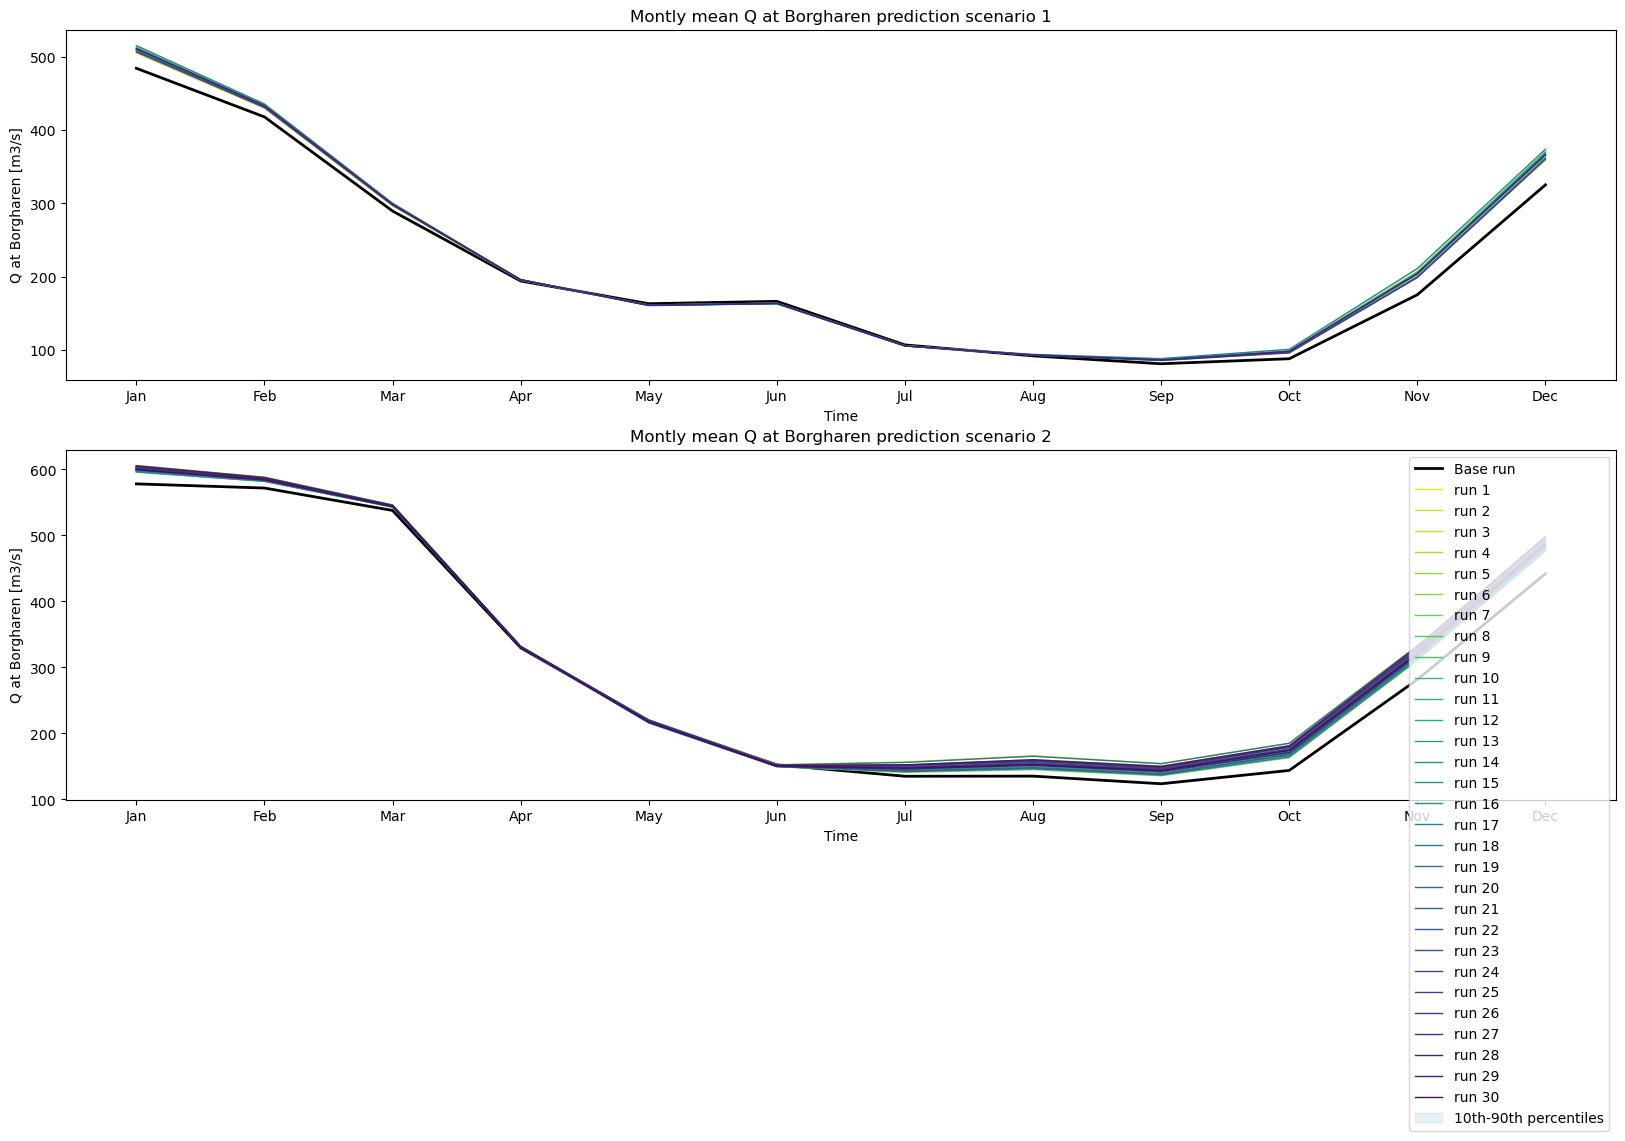

In [10]:
fig, axs = plt.subplots(2, 1, figsize=(20, 10))

for k in range(2):
    Q16_combined = Q16_combinedv[k]
    runsnr = runsnrv[k]

    Q16_combined_m = Q16_combined.groupby(Q16_combined.index.month).mean()
    Q16_combined_m.index = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

    Q16_combined_m_runs = Q16_combined_m.drop("run 0", axis=1)

    p10 = Q16_combined_m_runs.quantile(0.1, axis=1)
    p90 = Q16_combined_m_runs.quantile(0.9, axis=1)

    Q16_combined_m_runs["10th_percentile"] = p10
    Q16_combined_m_runs["90th_percentile"] = p90

    time = Q16_combined_m.index
    run_0 = Q16_combined_m["run 0"]

    for i in runsnr:
        if i == 0:
            axs[k].plot(time, run_0, 'k', label='Base run', linewidth = '2')
        else:
            run = Q16_combined_m[f"run {i}"]
            axs[k].plot(time, run, '-', label=f'run {i}', linewidth = '1', color=plt.cm.viridis_r(i / len(runsnr)))
            
    axs[k].fill_between(time, Q16_combined_m_runs["10th_percentile"], Q16_combined_m_runs["90th_percentile"], color=TUblauw, alpha=0.1, label='10th-90th percentiles')

    if k>0:
        axs[k].legend()
    axs[k].set_xlabel("Time")
    axs[k].set_ylabel("Q at Borgharen [m3/s]")
    axs[k].set_title(f"Montly mean Q at Borgharen prediction scenario {k+1}")

plt.savefig(f'1_Output/{output}/Q_16_percentiles_monthly.png')

## Max annual Q

In [65]:
mean_annual_avg = pd.DataFrame()
mean_annual_max = pd.DataFrame()

for i in runsnr:
    for u in range(len(WFLOW_id)):
        col_name = f'run {i} ID {WFLOW_id[u]}'
        annual_max = max(Q_1[col_name]) # calculate the annual maximum value
        annual_max = Q_1[col_name].resample('A').max() 
        annual_mean = Q_1[col_name].resample('A').mean()
        mean_an_max = np.mean(annual_max)
        mean_an = np.mean(annual_mean)
        mean_annual_max.loc[f'run {i}', f'ID {WFLOW_id[u]}'] = mean_an_max
        mean_annual_avg.loc[f'run {i}', f'ID {WFLOW_id[u]}'] = mean_an

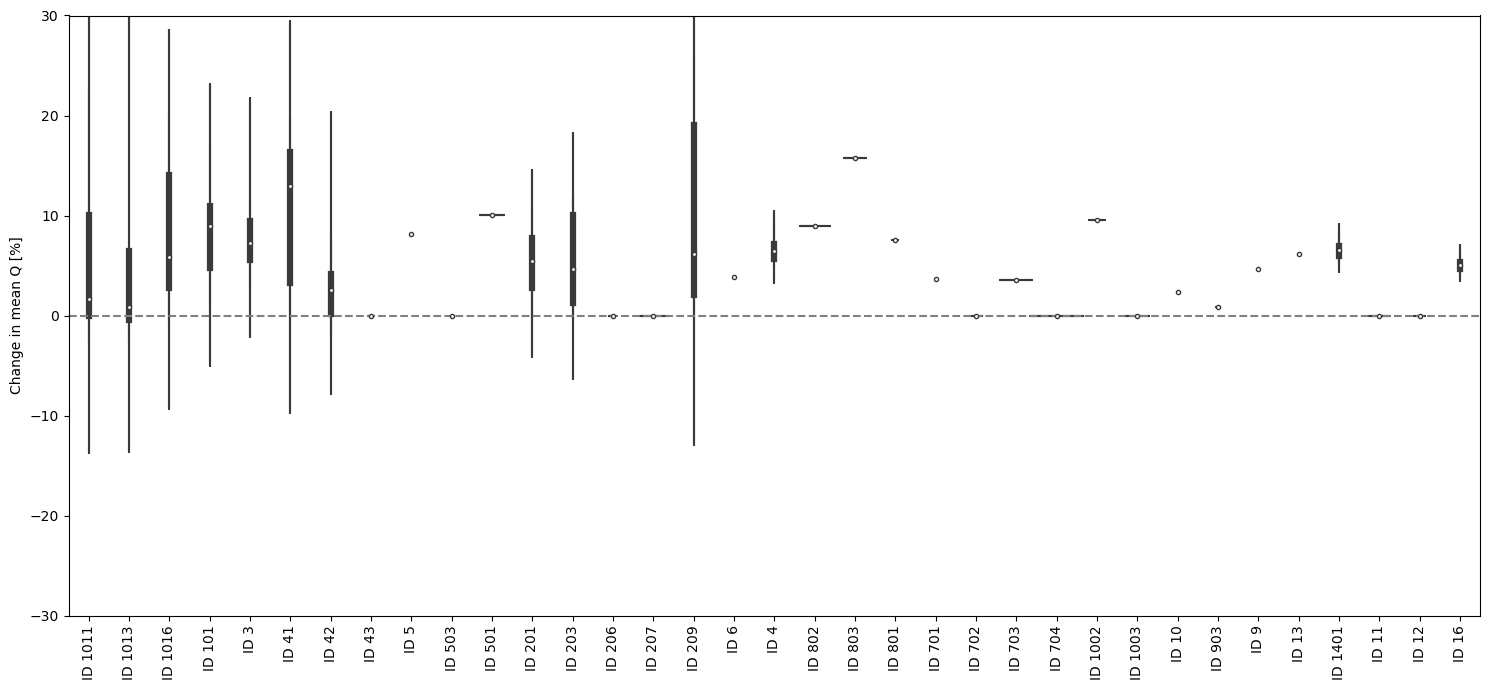

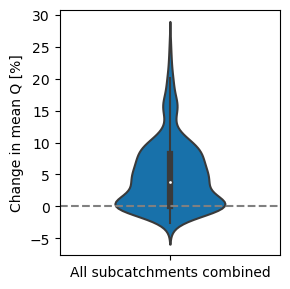

In [45]:
mean_annual_perc = pd.DataFrame()
mean_annual_diff = pd.DataFrame()
for i in runsnr:
    for u in range(len(WFLOW_id)):
        mean_an0 = mean_annual_avg.loc[f'run 0', f'ID {WFLOW_id[u]}']
        if i > 0:
            mean_an = mean_annual_avg.loc[f'run {i}', f'ID {WFLOW_id[u]}']
            mean_an_perc = (mean_an - mean_an0) / mean_an0 * 100
            mean_an_diff =  (mean_an - mean_an0) 
            mean_annual_perc.loc[f'run {i}', f'ID {WFLOW_id[u]}'] = mean_an_perc
            mean_annual_diff.loc[f'run {i}', f'ID {WFLOW_id[u]}'] = mean_an_diff
            
plt.figure(figsize=(15, 7))
sns.violinplot(data=mean_annual_perc, color=TUblauw, width=1.3)
plt.xticks(rotation=90)
plt.ylim(-30, 30)
plt.axhline(0, color='grey', linestyle='--')
plt.ylabel('Change in mean Q [%]')
plt.tight_layout()
plt.savefig(f'1_Output/{output}/Change_in_mean_Q.png')
plt.show()

combined_perc = pd.concat([mean_annual_perc[col] for col in mean_annual_perc.columns])

plt.figure(figsize=(3, 3))
sns.violinplot(data=combined_perc, color=TUblauw, width=0.5)
# plt.ylim(-25, 25)
plt.axhline(0, color='grey', linestyle='--')
plt.ylabel('Change in mean Q [%]')
plt.xticks([0], ['All subcatchments combined'])
plt.tight_layout()
plt.savefig(f'1_Output/{output}/Change_in_mean_Q_combined.png')
plt.show()

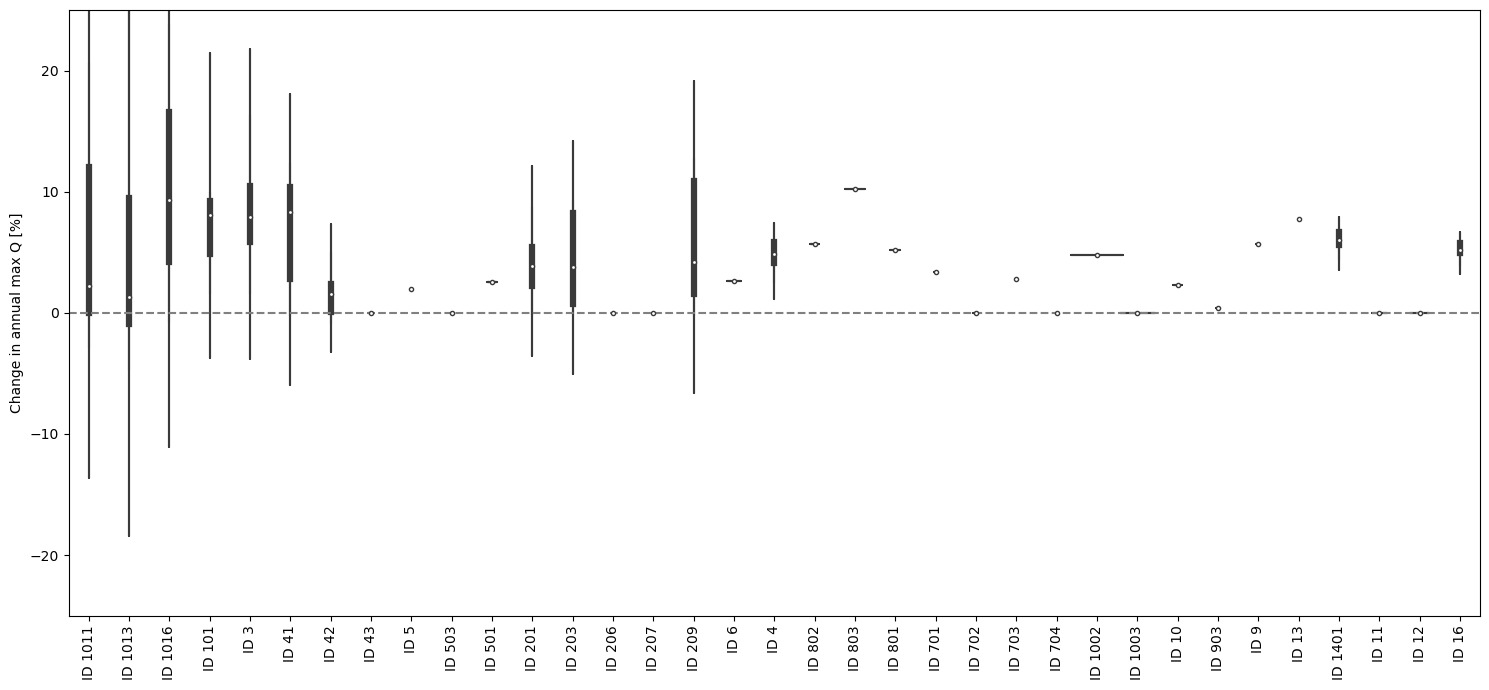

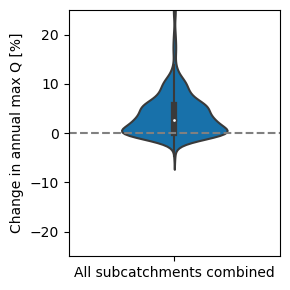

In [11]:
mean_annual_perc = pd.DataFrame()
mean_annual_diff = pd.DataFrame()
for i in runsnr:
    for u in range(len(WFLOW_id)):
        mean_an0 = mean_annual_max.loc[f'run 0', f'ID {WFLOW_id[u]}']
        if i > 0:
            mean_an = mean_annual_max.loc[f'run {i}', f'ID {WFLOW_id[u]}']
            mean_an_perc = (mean_an - mean_an0) / mean_an0 * 100
            mean_an_diff =  (mean_an - mean_an0) 
            mean_annual_perc.loc[f'run {i}', f'ID {WFLOW_id[u]}'] = mean_an_perc
            mean_annual_diff.loc[f'run {i}', f'ID {WFLOW_id[u]}'] = mean_an_diff
            
        

plt.figure(figsize=(15, 7))
sns.violinplot(data=mean_annual_perc, color=TUblauw, width=1.3)
plt.xticks(rotation=90)
plt.ylim(-25, 25)
plt.axhline(0, color='grey', linestyle='--')
plt.ylabel('Change in annual max Q [%]')
plt.tight_layout()
plt.savefig(f'1_Output/{output}/Change_in_max_Q.png')
plt.show()

combined_perc = pd.concat([mean_annual_perc[col] for col in mean_annual_perc.columns])

plt.figure(figsize=(3, 3))
sns.violinplot(data=combined_perc, color=TUblauw, width=0.5)
plt.ylim(-25, 25)
plt.axhline(0, color='grey', linestyle='--')
plt.ylabel('Change in annual max Q [%]')
plt.xticks([0], ['All subcatchments combined'])
plt.tight_layout()
plt.savefig(f'1_Output/{output}/Change_in_max_Q_combined.png')
plt.show()

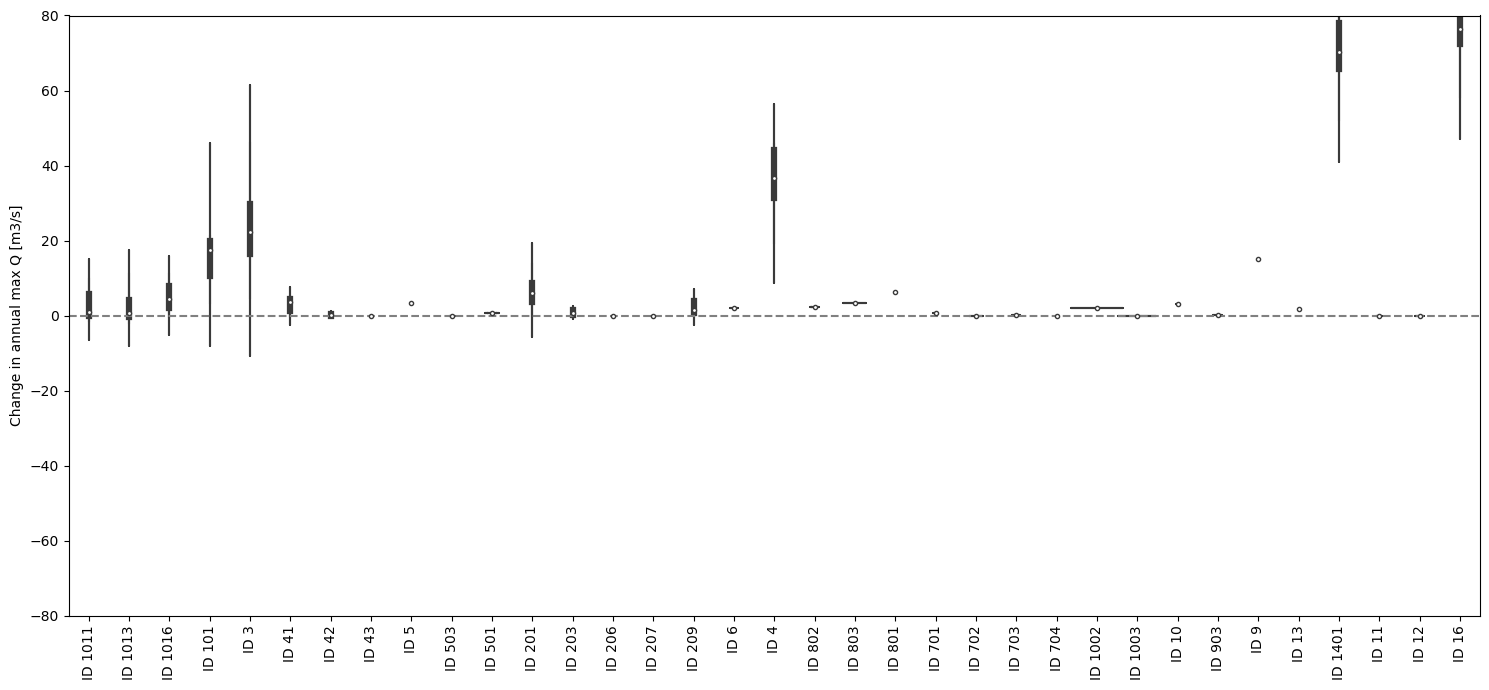

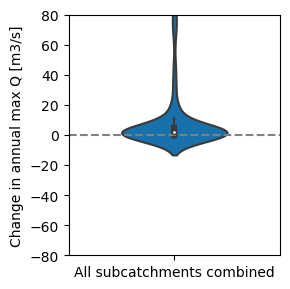

In [12]:
plt.figure(figsize=(15, 7))
sns.violinplot(data=mean_annual_diff, color=TUblauw, width=1.3)
plt.xticks(rotation=90)
plt.ylim(-80, 80)
plt.axhline(0, color='grey', linestyle='--')
plt.ylabel('Change in annual max Q [m3/s]')
plt.tight_layout()
plt.savefig(f'1_Output/{output}/Change_in_max_Q_m3.png')
plt.show()

combined_perc = pd.concat([mean_annual_diff[col] for col in mean_annual_diff.columns])

plt.figure(figsize=(3, 3))
sns.violinplot(data=combined_perc, color=TUblauw, width=0.5)
plt.ylim(-80, 80)
plt.axhline(0, color='grey', linestyle='--')
plt.ylabel('Change in annual max Q [m3/s]')
plt.xticks([0], ['All subcatchments combined'])
plt.tight_layout()
plt.savefig(f'1_Output/{output}/Change_in_max_Q_m3_combined.png')
plt.show()

## List of all variables

In [94]:
data = pd.read_csv(f'C:/Users/Nienke Tempel/Documents/Thesis/11. Model/Model/flextopo_update_sumax_0/output.csv')
column_list = data.columns.tolist()
print(column_list)

['time', 'Q_1', 'Q_1011', 'Q_1013', 'Q_1016', 'Q_206', 'Q_209', 'Q_207', 'Q_203', 'Q_41', 'Q_503', 'Q_42', 'Q_43', 'Q_501', 'Q_802', 'Q_6', 'Q_1002', 'Q_1003', 'Q_803', 'Q_701', 'Q_903', 'Q_703', 'Q_702', 'Q_704', 'Q_11', 'Q_13', 'Q_12', 'Q_2001', 'Q_2007', 'Q_2002', 'Q_2003', 'Q_2008', 'Q_2004', 'Q_2005', 'Q_2009', 'Q_2010', 'Q_2011', 'Q_2012', 'Q_2013', 'Q_2014', 'Q_2006', 'Q_101', 'Q_201', 'Q_5', 'Q_801', 'Q_10', 'Q_9', 'Q_3', 'Q_4', 'Q_1401', 'Q_16', 'Qall_1011', 'Qall_1013', 'Qall_1016', 'Qall_101', 'Qall_206', 'Qall_209', 'Qall_3', 'Qall_207', 'Qall_203', 'Qall_201', 'Qall_41', 'Qall_503', 'Qall_42', 'Qall_43', 'Qall_501', 'Qall_5', 'Qall_802', 'Qall_6', 'Qall_4', 'Qall_1002', 'Qall_1003', 'Qall_803', 'Qall_701', 'Qall_801', 'Qall_903', 'Qall_703', 'Qall_702', 'Qall_10', 'Qall_704', 'Qall_9', 'Qall_11', 'Qall_1401', 'Qall_13', 'Qall_12', 'Qall_16', 'Qall_2001', 'Qall_2007', 'Qall_2002', 'Qall_2003', 'Qall_2008', 'Qall_2004', 'Qall_2005', 'Qall_2009', 'Qall_2010', 'Qall_2011', 'Qa